In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential


In [3]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [6]:
model = tf.keras.Sequential()


model.add(Dense(64, name='dense_layer', input_shape=(784,), activation = 'relu'))
model.add(Dense(64, name='dense_layer_2', activation='relu'))
model.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

training = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.3565 - accuracy: 0.8963 - val_loss: 0.1990 - val_accuracy: 0.9445
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1523 - accuracy: 0.9539 - val_loss: 0.1358 - val_accuracy: 0.9607
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1093 - accuracy: 0.9672 - val_loss: 0.1192 - val_accuracy: 0.9675
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0868 - accuracy: 0.9737 - val_loss: 0.1150 - val_accuracy: 0.9666
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.1039 - val_accuracy: 0.9703
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0592 - accuracy: 0.9820 - val_loss: 0.1106 - val_accuracy: 0.9699
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.1062 - val_accuracy: 0.9688
Epoch 

In [7]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


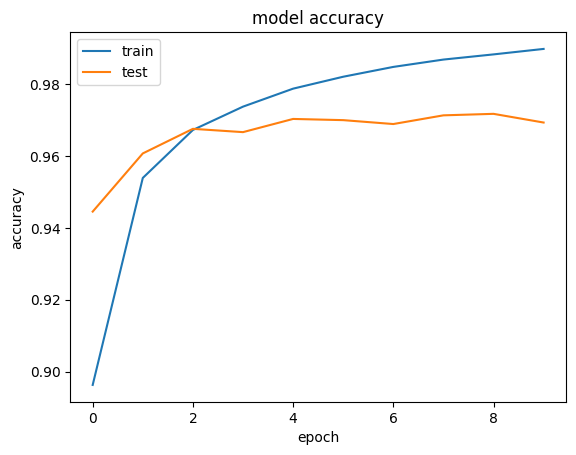

In [8]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

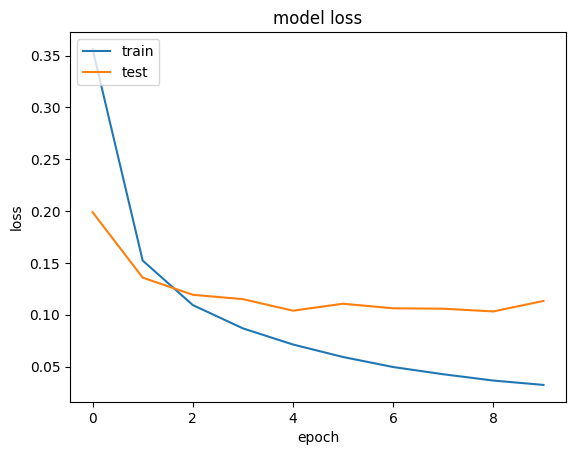

In [9]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.9715
Test accuracy: 0.9714999794960022


In [11]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None